In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import make_circles
import tensorflow as tf

import os
import random

from tensorflow.keras.layers import InputLayer, Dense

# Description of the data attributes is as below:

- Area(total): Total area of the plot.
- Trooms: Total Number of rooms in the house
- Nbedrooms: Number of bedroom in the house
- Nbwashrooms: Number of washroom attached with bedroom
- Twashrooms: total number of washroom in the house.
- Roof: Does the house has roof(yes or no)
- Roof(Area): Total area of the terrace
- Lawn(Area): Area of the lawn including garden and parking
- Nfloor: Number of floors in the house
- API: Air purity index api is in percentage for example if api is 85 it means its 85% of the standard api for the city.
- ANB: Amenities near by amenities like hospital, park , multiplex , malls etc within 2 miles.
- Expected price: price expected by seller.
- Grade: Grade provided by company that depends on the condition and other features mentioned in the data. *(Note A is best garde and E is worst.)*

 Evaluation: The metric of evaluation for this prediction problem is Accuracy.

In [43]:
old_df = pd.read_csv("TRAINING_.csv")
old_df.sample(20)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
6324,6325,336,7.0,5.0,4.0,6.0,NO,0.0,77.0,3,89.0,4,D,3421$
5845,5846,301,8.0,5.0,2.0,4.0,YES,97.0,85.0,4,88.0,3,C,3739$
2510,2511,342,5.0,4.0,3.0,4.0,yes,82.0,109.0,3,74.0,4,D,3950$
5955,5956,303,6.0,5.0,4.0,6.0,NaN,NaN,108.0,4,71.0,4,D,3626$
238,239,323,5.0,6.0,4.0,6.0,YES,103.0,102.0,5,60.0,5,C,3623$
5396,5397,351,6.0,4.0,3.0,4.0,NO,0.0,100.0,1,69.0,2,D,3318$
2924,2925,304,8.0,8.0,6.0,7.0,NaN,NaN,80.0,6,77.0,1,B,4952$
5879,5880,331,9.0,6.0,7.0,8.0,YES,81.0,73.0,6,76.0,6,A,4424$
6322,6323,315,6.0,5.0,3.0,4.0,NO,0.0,81.0,2,86.0,6,D,3610$
362,363,326,8.0,4.0,2.0,3.0,no,0.0,71.0,4,97.0,6,C,3934$


In [44]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [45]:
old_df["EXPECTED"] = old_df["EXPECTED"].str.replace("$","").astype("float")


In [46]:
old_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826.0
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458.0
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199.0
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462.0
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717.0
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339.0
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829.0
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488.0


In [47]:
df = old_df.drop(columns=(["roof", "Roof(Area)", "Grade", "id"]))

## handel missing values

In [48]:
df.isnull().sum()

Area(total)    0
Troom          2
Nbedrooms      3
Nbwashrooms    2
Twashrooms     1
Lawn(Area)     2
Nfloors        0
API            1
ANB            0
EXPECTED       0
dtype: int64

In [49]:
df.head(10)

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826.0
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458.0
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199.0
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462.0
4,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,4543.0
5,335,8.0,6.0,5.0,7.0,99.0,6,75.0,1,4324.0
6,322,9.0,4.0,1.0,3.0,78.0,4,65.0,4,4221.0
7,346,8.0,3.0,2.0,4.0,87.0,2,72.0,4,3438.0
8,298,5.0,5.0,4.0,6.0,103.0,6,62.0,2,3357.0
9,329,5.0,7.0,7.0,8.0,79.0,6,67.0,3,4073.0


In [50]:
#mode
mode_col = ["Troom","Nbedrooms","Nbwashrooms","Twashrooms"]

In [51]:
#mean
mean_col= ["Lawn(Area)", "API"]

In [52]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "most_frequent")

df[mode_col] = pd.DataFrame(si.fit_transform(df[mode_col]), index = df.index, columns = mode_col)


In [53]:
si = SimpleImputer(strategy = "mean")
df[mean_col] = pd.DataFrame(si.fit_transform(df[mean_col]), index = df.index, columns = mean_col)


In [54]:
df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   int64  
 1   Troom        7000 non-null   float64
 2   Nbedrooms    7000 non-null   float64
 3   Nbwashrooms  7000 non-null   float64
 4   Twashrooms   7000 non-null   float64
 5   Lawn(Area)   7000 non-null   float64
 6   Nfloors      7000 non-null   int64  
 7   API          7000 non-null   float64
 8   ANB          7000 non-null   int64  
 9   EXPECTED     7000 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 547.0 KB


## scaling

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scale = pd.DataFrame(ss.fit_transform(df), columns=df.columns, index=df.index)

In [57]:
df_scale

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.984255,0.695196,-1.810562,-1.881612,-1.657462,-1.181860,-1.370481,-1.348076,0.297170,-0.423898
1,0.913637,-0.713102,1.214099,1.876064,1.655947,-0.589151,1.360183,1.520941,-1.467196,0.849083
2,-1.519558,0.695196,-0.600698,-0.629053,-0.994780,-1.012515,-1.916614,0.761495,0.297170,0.327403
3,0.135015,-1.417250,-0.600698,-1.255332,-0.994780,0.088230,0.267917,0.592730,-1.467196,-1.157071
4,-1.470894,1.399345,0.004235,-0.629053,-0.332098,0.596266,-0.278216,1.183409,-0.290952,1.020291
...,...,...,...,...,...,...,...,...,...,...
6995,-0.935591,0.695196,-1.810562,-1.881612,-1.657462,-1.012515,-1.916614,-0.504247,0.885291,-0.643447
6996,0.767645,-1.417250,-1.205630,-1.255332,-0.994780,-1.520551,-0.278216,-0.251099,0.297170,-1.404819
6997,-0.935591,-0.713102,-0.600698,-1.255332,-0.994780,-0.843169,-0.278216,1.436558,0.297170,-0.417856
6998,0.621653,0.695196,1.214099,1.249785,0.993265,0.426921,-0.278216,0.423964,-1.467196,0.909510


## k-mean

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')

kmeans.fit(df_scale)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [59]:
df["cluster"] = kmeans.labels_

In [60]:
df

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED,cluster
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826.0,2
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458.0,4
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199.0,3
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462.0,2
4,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,4543.0,3
...,...,...,...,...,...,...,...,...,...,...,...
6995,306,8.0,2.0,1.0,3.0,78.0,1,73.0,5,3717.0,2
6996,341,5.0,3.0,2.0,4.0,72.0,4,76.0,4,3339.0,2
6997,306,6.0,4.0,2.0,4.0,80.0,4,96.0,4,3829.0,2
6998,338,8.0,7.0,6.0,7.0,95.0,4,84.0,1,4488.0,4


In [61]:
df["Roof(Area)"] = old_df["Roof(Area)"]

In [62]:
# df.groupby(["cluster"])["Roof(Area)"].median()

In [63]:
df.groupby(["cluster"])["Roof(Area)"].mean()

cluster
0    44.518554
1    46.198919
2    44.628081
3    49.198255
4    51.573296
Name: Roof(Area), dtype: float64

In [64]:
zero = df["cluster"]==0
df.loc[zero] = df.loc[zero].fillna(value=44.51)
# df.loc[zero]

In [65]:
one = df["cluster"]==1
df.loc[one] = df.loc[one].fillna(value=46.19)

In [66]:
two = df["cluster"]==2
df.loc[two] = df.loc[two].fillna(value=44.62)

In [67]:
three = df["cluster"]==3
df.loc[three] = df.loc[three].fillna(value=49.19)

In [68]:
four = df["cluster"]==4
df.loc[four] = df.loc[four].fillna(value=51.57)

In [69]:
df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
cluster        0
Roof(Area)     0
dtype: int64

## df

In [70]:
df.drop(columns=["cluster"], inplace=True)

In [71]:
df = pd.concat([df,old_df["Grade"]],axis=1)

In [72]:
df["Grade"] = df["Grade"].replace({"A":4, "B":3, "C":2, "D":1, "E":0})

In [73]:
df

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED,Roof(Area),Grade
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826.0,0.00,1
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458.0,0.00,3
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199.0,97.00,2
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462.0,0.00,1
4,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,4543.0,49.19,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,306,8.0,2.0,1.0,3.0,78.0,1,73.0,5,3717.0,44.62,1
6996,341,5.0,3.0,2.0,4.0,72.0,4,76.0,4,3339.0,100.00,1
6997,306,6.0,4.0,2.0,4.0,80.0,4,96.0,4,3829.0,83.00,1
6998,338,8.0,7.0,6.0,7.0,95.0,4,84.0,1,4488.0,0.00,3


## x,y

In [74]:
X = df.drop(columns=["Grade"])
y = df["Grade"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5600, 11)
(1400, 11)


## scale

In [76]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scale = pd.DataFrame(ss.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scale = pd.DataFrame(ss.transform(X_test), index=X_test.index, columns=X_test.columns)


# ~Models


## 1. LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train_scale,y_train)
y_pred = lr.predict(X_test_scale)

print(f'Accuracy on train_data = {lr.score(X_train_scale, y_train)}')
print(f'Accuracy on test_data = {lr.score(X_test_scale, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 0.8930357142857143
Accuracy on test_data = 0.8835714285714286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.91      0.92      0.91       419
           2       0.89      0.89      0.89       586
           3       0.82      0.88      0.85       296
           4       0.96      0.78      0.86        94

    accuracy                           0.88      1400
   macro avg       0.72      0.69      0.70      1400
weighted avg       0.88      0.88      0.88      1400



## 2. DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)


print(f'Accuracy on train_data = {dtree.score(X_train, y_train)}')
print(f'Accuracy on test_data = {dtree.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 1.0
Accuracy on test_data = 0.7957142857142857
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.86      0.86      0.86       419
           2       0.80      0.83      0.81       586
           3       0.72      0.69      0.70       296
           4       0.68      0.67      0.68        94

    accuracy                           0.80      1400
   macro avg       0.73      0.73      0.73      1400
weighted avg       0.79      0.80      0.80      1400



## 3. RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(f'Accuracy on train_data = {rfc.score(X_train, y_train)}')
print(f'Accuracy on test_data = {rfc.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 1.0
Accuracy on test_data = 0.8757142857142857
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.94      0.90      0.92       419
           2       0.86      0.92      0.89       586
           3       0.82      0.82      0.82       296
           4       0.92      0.71      0.80        94

    accuracy                           0.88      1400
   macro avg       0.81      0.71      0.74      1400
weighted avg       0.88      0.88      0.87      1400



## 4. BaggingClassifier

In [41]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state=42, estimator=rfc)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print(f'Accuracy on train_data = {bc.score(X_train, y_train)}')
print(f'Accuracy on test_data = {bc.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

## 5. Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print(f'Accuracy on train_data = {gb.score(X_train, y_train)}')
print(f'Accuracy on test_data = {gb.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 0.9475
Accuracy on test_data = 0.8892857142857142
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.95      0.91      0.93       419
           2       0.88      0.94      0.91       586
           3       0.84      0.83      0.84       296
           4       0.86      0.72      0.79        94

    accuracy                           0.89      1400
   macro avg       0.81      0.72      0.75      1400
weighted avg       0.89      0.89      0.89      1400



### GradientBoostingClassifier - scaled

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scale, y_train)
y_pred = gb.predict(X_test_scale)

print(f'Accuracy on train_data = {gb.score(X_train_scale, y_train)}')
print(f'Accuracy on test_data = {gb.score(X_test_scale, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 0.9475
Accuracy on test_data = 0.8892857142857142
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.95      0.91      0.93       419
           2       0.88      0.94      0.91       586
           3       0.84      0.83      0.84       296
           4       0.86      0.72      0.79        94

    accuracy                           0.89      1400
   macro avg       0.81      0.72      0.75      1400
weighted avg       0.89      0.89      0.89      1400



## 6. XGboost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f'Accuracy on train_data = {xgb.score(X_train, y_train)}')

print(f'Accuracy on test_data = {xgb.score(X_test, y_test)}')

print(classification_report(y_test, y_pred))

Accuracy on train_data = 1.0
Accuracy on test_data = 0.9171428571428571
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.95      0.93      0.94       419
           2       0.91      0.94      0.92       586
           3       0.88      0.90      0.89       296
           4       0.94      0.83      0.88        94

    accuracy                           0.92      1400
   macro avg       0.94      0.76      0.79      1400
weighted avg       0.92      0.92      0.92      1400



## ~ ANN

In [78]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [79]:
def plot_curve(history):
    history_df = pd.DataFrame(history.history)

    fig, ax = plt.subplots(1,2, figsize = (10,4))

    sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss", ax = ax[0])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss",ax = ax[0])


    sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy", ax = ax[1])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy", ax = ax[1])

    fig.suptitle("loss & accuracy curve plot")
    plt.tight_layout()
    plt.show()

## ann - 1

* 30 - 94%
* 36

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann1 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),
    Dense(200, 'relu'),
    Dropout(0.2),
    Dense(150, 'relu'),
    Dropout(0.2),
    Dense(100, 'relu'),
    Dense(50, 'relu'),
    Dropout(0.3),
    Dense(5, 'softmax')])

# model compile
ann1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model fit
result1 = ann1.fit(X_train_scale, y_train, epochs=70,batch_size=16, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/70
350/350 [==============================] - 4s 6ms/step - loss: 0.5954 - accuracy: 0.7723 - val_loss: 0.3324 - val_accuracy: 0.8657
Epoch 2/70
350/350 [==============================] - 2s 5ms/step - loss: 0.3707 - accuracy: 0.8562 - val_loss: 0.2835 - val_accuracy: 0.8879
Epoch 3/70
350/350 [==============================] - 2s 5ms/step - loss: 0.3198 - accuracy: 0.8727 - val_loss: 0.2572 - val_accuracy: 0.8921
Epoch 4/70
350/350 [==============================] - 2s 5ms/step - loss: 0.2885 - accuracy: 0.8830 - val_loss: 0.2308 - val_accuracy: 0.9086
Epoch 5/70
350/350 [==============================] - 2s 5ms/step - loss: 0.2678 - accuracy: 0.8920 - val_loss: 0.2250 - val_accuracy: 0.9064
Epoch 6/70
350/350 [==============================] - 2s 5ms/step - loss: 0.2427 - accuracy: 0.9054 - val_loss: 0.2129 - val_accuracy: 0.9164
Epoch 7/70
350/350 [==============================] - 2s 5ms/step - loss: 0.2278 - accuracy: 0.9114 - val_loss: 0.2253 - val_a

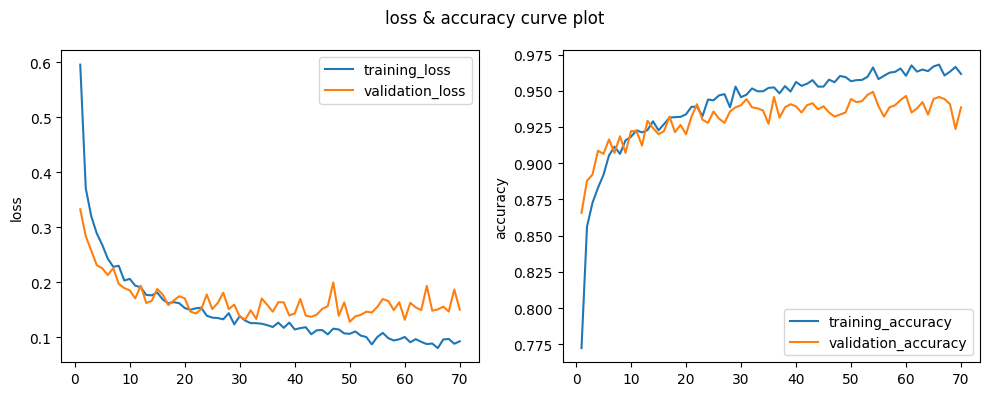

In [ ]:
plot_curve(result1)

## ann -2 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann2 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),

    Dense(250, 'relu'),
    Dense(200, 'relu'),
    Dense(150, 'relu'),
    Dropout(0.2),

    Dense(100, 'relu'),
    Dense(50, 'relu'),
    Dropout(0.2),

    Dense(5, 'softmax')])

# model compile
ann2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model fit
result2 = ann2.fit(X_train_scale, y_train, epochs=50,batch_size=12, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/50
467/467 [==============================] - 5s 7ms/step - loss: 0.4803 - accuracy: 0.8114 - val_loss: 0.3033 - val_accuracy: 0.8679
Epoch 2/50
467/467 [==============================] - 3s 6ms/step - loss: 0.2983 - accuracy: 0.8855 - val_loss: 0.2418 - val_accuracy: 0.8864
Epoch 3/50
467/467 [==============================] - 3s 5ms/step - loss: 0.2569 - accuracy: 0.8957 - val_loss: 0.2303 - val_accuracy: 0.9079
Epoch 4/50
467/467 [==============================] - 3s 5ms/step - loss: 0.2280 - accuracy: 0.9079 - val_loss: 0.2023 - val_accuracy: 0.9114
Epoch 5/50
467/467 [==============================] - 3s 6ms/step - loss: 0.2097 - accuracy: 0.9118 - val_loss: 0.2215 - val_accuracy: 0.9064
Epoch 6/50
467/467 [==============================] - 3s 6ms/step - loss: 0.1837 - accuracy: 0.9241 - val_loss: 0.1720 - val_accuracy: 0.9207
Epoch 7/50
467/467 [==============================] - 3s 6ms/step - loss: 0.1680 - accuracy: 0.9309 - val_loss: 0.1752 - val_a

KeyboardInterrupt: 

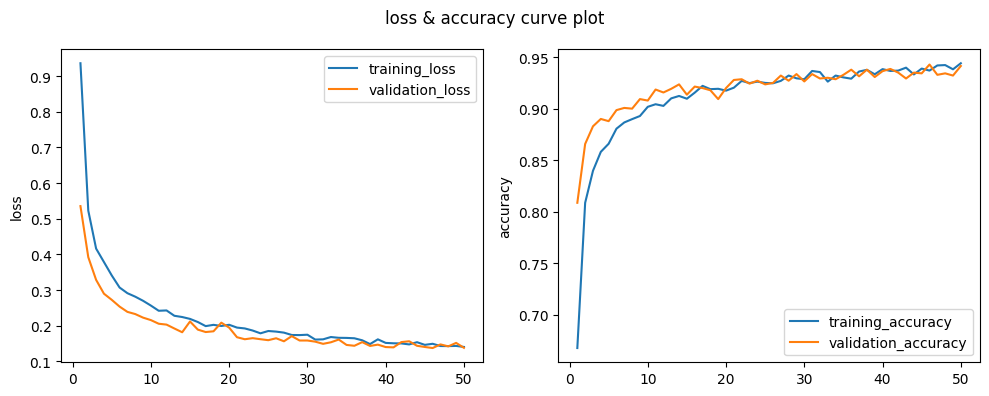

In [ ]:
plot_curve(result2)

## ann - 3
sgd

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann3 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),

    Dense(250, 'relu'),
    Dropout(0.1),

    Dense(200, 'relu'),
    Dense(150, 'relu'),
    Dropout(0.2),

    Dense(100, 'relu'),
    Dense(50, 'relu'),
    Dropout(0.2),

    Dense(5, 'softmax')])

# model compile
ann3.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# model fit
result3 = ann3.fit(X_train_scale, y_train, epochs=50,batch_size=12, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/50
467/467 [==============================] - 5s 6ms/step - loss: 0.9900 - accuracy: 0.6252 - val_loss: 0.4842 - val_accuracy: 0.8257
Epoch 2/50
467/467 [==============================] - 2s 5ms/step - loss: 0.4706 - accuracy: 0.8220 - val_loss: 0.3448 - val_accuracy: 0.8657
Epoch 3/50
467/467 [==============================] - 2s 5ms/step - loss: 0.3492 - accuracy: 0.8636 - val_loss: 0.2723 - val_accuracy: 0.8950
Epoch 4/50
467/467 [==============================] - 2s 5ms/step - loss: 0.3101 - accuracy: 0.8773 - val_loss: 0.2335 - val_accuracy: 0.9079
Epoch 5/50
467/467 [==============================] - 3s 5ms/step - loss: 0.2729 - accuracy: 0.8921 - val_loss: 0.2436 - val_accuracy: 0.8943
Epoch 6/50
467/467 [==============================] - 2s 5ms/step - loss: 0.2514 - accuracy: 0.8980 - val_loss: 0.2024 - val_accuracy: 0.9157
Epoch 7/50
467/467 [==============================] - 2s 5ms/step - loss: 0.2363 - accuracy: 0.9089 - val_loss: 0.2096 - val_a

In [ ]:
plot_curve(result3)

## ann - 4 *

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann4 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),

    # Dense(250, 'relu'),
    # Dropout(0.1),

    # Dense(200, 'relu'),
    Dense(150, 'relu'),
    Dropout(0.2),

    Dense(100, 'relu'),
    Dense(50, 'relu'),
    Dropout(0.2),

    Dense(5, 'softmax')])

# model compile
ann4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# model fit
result4 = ann4.fit(X_train_scale, y_train, epochs=50,batch_size=12, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/50
467/467 [==============================] - 4s 5ms/step - loss: 0.9361 - accuracy: 0.6675 - val_loss: 0.5354 - val_accuracy: 0.8086
Epoch 2/50
467/467 [==============================] - 2s 4ms/step - loss: 0.5228 - accuracy: 0.8086 - val_loss: 0.3922 - val_accuracy: 0.8657
Epoch 3/50
467/467 [==============================] - 2s 4ms/step - loss: 0.4163 - accuracy: 0.8396 - val_loss: 0.3285 - val_accuracy: 0.8829
Epoch 4/50
467/467 [==============================] - 2s 4ms/step - loss: 0.3786 - accuracy: 0.8580 - val_loss: 0.2898 - val_accuracy: 0.8900
Epoch 5/50
467/467 [==============================] - 2s 4ms/step - loss: 0.3409 - accuracy: 0.8659 - val_loss: 0.2725 - val_accuracy: 0.8879
Epoch 6/50
467/467 [==============================] - 2s 4ms/step - loss: 0.3070 - accuracy: 0.8805 - val_loss: 0.2536 - val_accuracy: 0.8986
Epoch 7/50
467/467 [==============================] - 2s 4ms/step - loss: 0.2911 - accuracy: 0.8866 - val_loss: 0.2388 - val_a

In [ ]:
plot_curve(result4)

## ann - 5*

In [80]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann5 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),

    Dense(100, 'relu'),
    Dropout(0.2),

    Dense(70, 'relu'),
    Dense(50, 'relu'),
    Dense(20, 'relu'),

    Dropout(0.2),

    Dense(5, 'softmax')])

# model compile
ann5.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# model fit
result5 = ann5.fit(X_train_scale, y_train, epochs=50,batch_size=12, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/50
467/467 [==============================] - 2s 3ms/step - loss: 1.0627 - accuracy: 0.5755 - val_loss: 0.5826 - val_accuracy: 0.8071
Epoch 2/50
467/467 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.7952 - val_loss: 0.4112 - val_accuracy: 0.8643
Epoch 3/50
467/467 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.8238 - val_loss: 0.3428 - val_accuracy: 0.8843
Epoch 4/50
467/467 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8530 - val_loss: 0.3114 - val_accuracy: 0.8807
Epoch 5/50
467/467 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8586 - val_loss: 0.2836 - val_accuracy: 0.9007
Epoch 6/50
467/467 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8725 - val_loss: 0.2704 - val_accuracy: 0.8957
Epoch 7/50
467/467 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.8855 - val_loss: 0.2576 - val_a

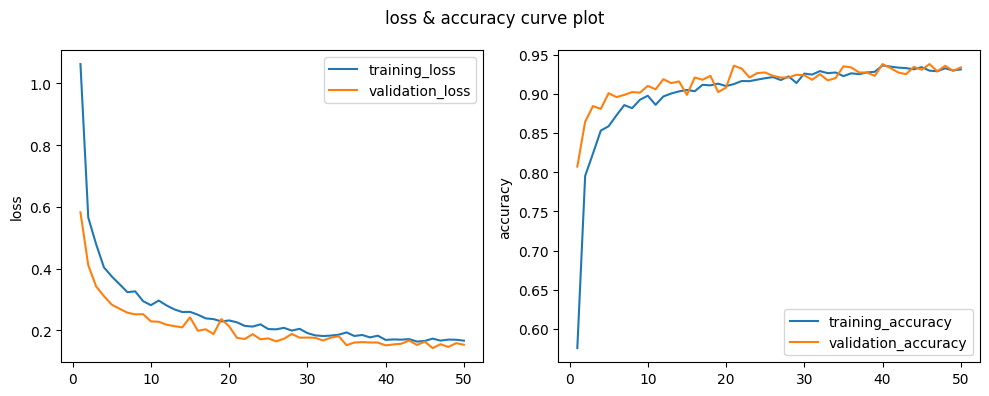

In [81]:
plot_curve(result5)

In [82]:
ann5.evaluate(X_test_scale, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9336


[0.15387338399887085, 0.933571457862854]

In [83]:
y_pred_ann5 = ann5.predict(X_test_scale)


44/44 [==============================] - 0s 1ms/step


In [84]:
y_pred_5 = np.argmax(y_pred_ann5, axis= 1)

In [85]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      0.97      0.97       419
           2       0.93      0.97      0.95       586
           3       0.88      0.90      0.89       296
           4       0.99      0.70      0.82        94

    accuracy                           0.93      1400
   macro avg       0.75      0.71      0.73      1400
weighted avg       0.93      0.93      0.93      1400



c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [86]:
ann5.save("ann_model5")

INFO:tensorflow:Assets written to: ann_model5\assets


INFO:tensorflow:Assets written to: ann_model5\assets


In [87]:
load_model_5 = tf.keras.models.load_model("ann_model5")

In [88]:
pd.Series(np.argmax(load_model_5.predict(X_test_scale),axis=1)).value_counts()

44/44 [==============================] - 0s 2ms/step


2    609
1    423
3    301
4     67
Name: count, dtype: int64

## next...

In [ ]:
y_preds = ann5.predict(X_test_scale)


44/44 [==============================] - 0s 3ms/step


In [ ]:
y_pred = np.argmax(y_preds, axis= 1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.97      0.97      0.97       419
           2       0.94      0.96      0.95       586
           3       0.92      0.86      0.89       296
           4       0.86      0.94      0.90        94

    accuracy                           0.94      1400
   macro avg       0.88      0.94      0.91      1400
weighted avg       0.94      0.94      0.94      1400



## save model

In [ ]:
# ann3.save("ann3")

INFO:tensorflow:Assets written to: ann3\assets


INFO:tensorflow:Assets written to: ann3\assets


In [ ]:
load_model= tf.keras.models.load_model("ann3")

In [ ]:
pd.Series(np.argmax(load_model.predict(X_test_scale),axis=1)).value_counts()

44/44 [==============================] - 0s 3ms/step


2    584
1    413
3    316
4     83
0      4
Name: count, dtype: int64